# LOGISTIC REGRESSION MODEL FOR HEART DISEASE PREDICTION
# IMPORTINGING OF LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [5]:
heart_data.duplicated().sum()

1

In [6]:
heart_data = heart_data.drop_duplicates()

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [10]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

# Splitting the Features and Target

In [11]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [12]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


# SAMPLING

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [15]:
X.shape, X_train.shape, X_test.shape,Y.shape,Y_train.shape,Y_test.shape

((302, 13), (241, 13), (61, 13), (302,), (241,), (61,))

# Model Training

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

### Accuracy Score ON TRAIN DATA

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print(training_data_accuracy)

0.8464730290456431


In [20]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  84.65 %


### Accuracy Score ON TEST DATA

In [21]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)
print(test_data_accuracy)

0.7868852459016393


In [22]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  78.69 %


**Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix

### TEST

In [24]:
cf_matrix = confusion_matrix(Y_test,Y_test_prediction)

print(cf_matrix)

[[19  9]
 [ 4 29]]


In [25]:
tp, fp, fn, tn = cf_matrix.ravel()

print(tp, fp, fn, tn)

19 9 4 29


<Axes: >

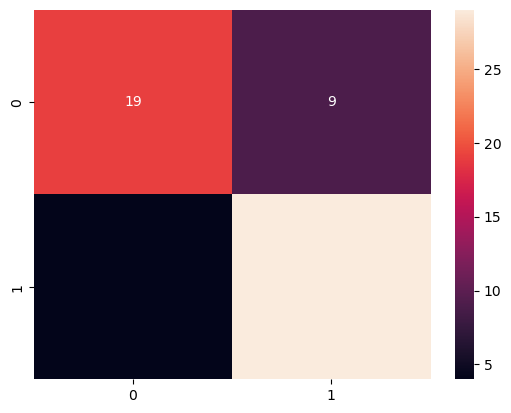

In [26]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### TRAIN

In [27]:
cf_matrix = confusion_matrix(Y_train,Y_train_prediction)

print(cf_matrix)

[[ 84  26]
 [ 11 120]]


In [28]:
tp, fp, fn, tn = cf_matrix.ravel()

print(tp, fp, fn, tn)

84 26 11 120


<Axes: >

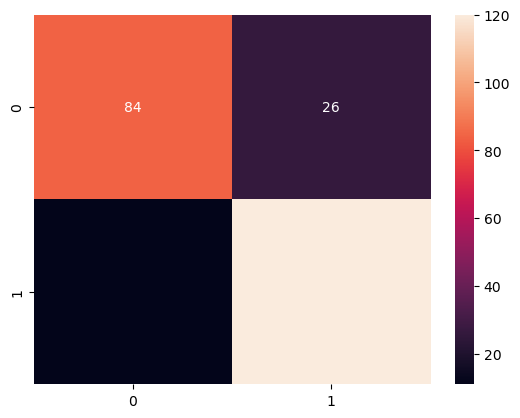

In [29]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Classification report

In [30]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       110
           1       0.82      0.92      0.87       131

    accuracy                           0.85       241
   macro avg       0.85      0.84      0.84       241
weighted avg       0.85      0.85      0.85       241



In [36]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



From the above study we come to the conlusion that 138 cases have defective heart needs to spesial care 
(may be qualifeied for cardiac surgery), 164 cases are manageble with medicine .

In [ ]:
************************************************DONE****************************************************